# Import Libraries

In [1]:
import pandas
import numpy
import keras
import tensorflow
import tensorflow as tf 
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Load Dataset

In [2]:
df = pd.read_csv('fake_reg.csv')

In [3]:
df.head(10)

,price,feature1,feature2
0,461.527929,999.787558,999.766096
1,548.130011,998.861615,1001.042403
2,410.297162,1000.070267,998.844015
3,540.382220,999.952251,1000.440940
4,546.024553,1000.446011,1000.338531
5,542.983672,999.693184,1000.628006
6,555.485664,1000.275855,1000.444949
7,417.569725,1000.414205,998.878486
8,373.146531,1000.016606,998.475997
9,633.350292,999.905646,1001.594481


In [4]:
df.tail(10)

,price,feature1,feature2
990,625.080185,1001.724740,1000.638738
991,434.275283,998.838508,999.705923
992,657.734251,1000.547353,1001.565843
993,518.356144,1000.127270,1000.094651
994,481.862806,998.960411,1000.242243
995,476.526078,1000.018988,999.672732
996,457.313186,998.855379,1000.020026
997,456.720992,1001.451646,998.847606
998,403.315576,1000.771023,998.562851
999,599.367093,999.232244,1001.451407


In [5]:
df.shape

(1000, 3)

In [6]:
df.isnull().sum()

price       0
feature1    0
feature2    0
dtype: int64

In [7]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Length: 1000, dtype: bool

In [8]:
df.columns

Index(['price', 'feature1', 'feature2'], dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   price     1000 non-null   float64
 1   feature1  1000 non-null   float64
 2   feature2  1000 non-null   float64
dtypes: float64(3)
memory usage: 23.6 KB


In [10]:
df.describe()

,price,feature1,feature2
count,1000.000000,1000.000000,1000.000000
mean,498.673029,1000.014171,999.979847
std,93.785431,0.974018,0.948330
min,223.346793,997.058347,996.995651
25%,433.025732,999.332068,999.316106
50%,502.382117,1000.009915,1000.002243
75%,564.921588,1000.637580,1000.645380
max,774.407854,1003.207934,1002.666308


In [11]:
df.corr()

,price,feature1,feature2
price,1.000000,0.444190,0.907576
feature1,0.444190,1.000000,0.030607
feature2,0.907576,0.030607,1.000000


# EDA(Exploratory Data Analysis)

## Data Visualization

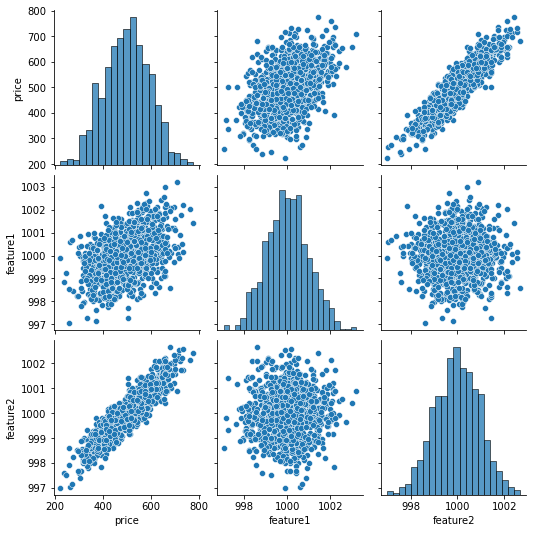

In [12]:
sns.pairplot(df)

<AxesSubplot:>

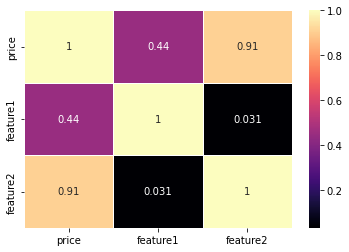

In [13]:
sns.heatmap(df.corr(), annot = True, cmap = 'magma',linewidths=1)

<AxesSubplot:xlabel='price', ylabel='Density'>

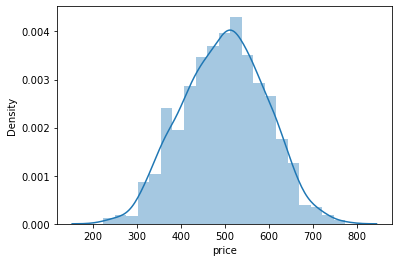

In [14]:
sns.distplot(df['price'])

<AxesSubplot:xlabel='feature1', ylabel='Density'>

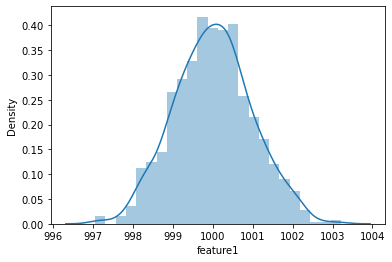

In [15]:
sns.distplot(df['feature1'])

<AxesSubplot:xlabel='feature2', ylabel='Density'>

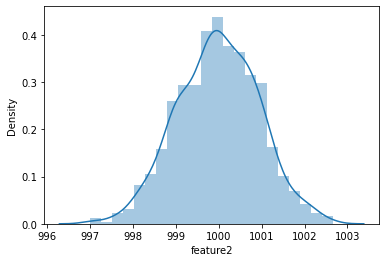

In [16]:
sns.distplot(df['feature2'])

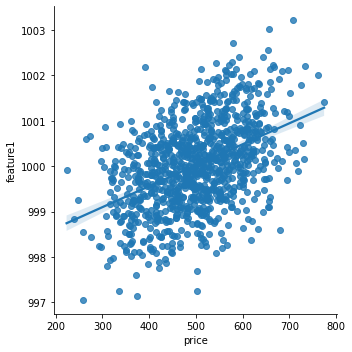

In [17]:
sns.lmplot(x = 'price',y = 'feature1', data =df)

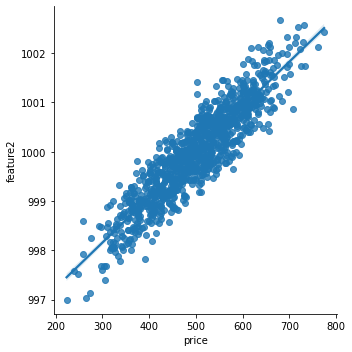

In [18]:
sns.lmplot(x = 'price',y = 'feature2', data = df)

# Train Test Split Dataset

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X = df[['feature1','feature2']].values
y = df['price'].values

In [21]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.30)

In [22]:
X_train.shape

(700, 2)

In [23]:
X_test.shape

(300, 2)

In [24]:
y_test.shape

(300,)

In [25]:
y_train.shape

(700,)

# Preprocessing 

## Normalizing/Scaling of Dataset

In [26]:
from sklearn.preprocessing import MinMaxScaler

In [27]:
scaler = MinMaxScaler()

### Notice to prevent data leakage from the test set, we only fit our scaler to the training set

In [28]:
scaler.fit(X_train)

MinMaxScaler()

In [29]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Building Model

In [30]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

In [31]:
model = Sequential()

model.add(Dense(4,activation='relu'))
model.add(Dense(4,activation='relu'))
model.add(Dense(4,activation='relu'))

model.add(Dense(1))

## Compiling Model

In [32]:
model.compile(optimizer='rmsprop',loss = 'mse')

## Training Model

In [33]:
model.fit(X_train,y_train,epochs=250)

Epoch 1/250
22/22 [==============================] - 1s 1ms/step - loss: 256678.9062
Epoch 2/250
22/22 [==============================] - 0s 1ms/step - loss: 256590.7188
Epoch 3/250
22/22 [==============================] - 0s 2ms/step - loss: 256495.0469
Epoch 4/250
22/22 [==============================] - 0s 1ms/step - loss: 256386.0156
Epoch 5/250
22/22 [==============================] - 0s 1ms/step - loss: 256262.1719
Epoch 6/250
22/22 [==============================] - 0s 1ms/step - loss: 256122.0156
Epoch 7/250
22/22 [==============================] - 0s 1ms/step - loss: 255963.2500
Epoch 8/250
22/22 [==============================] - 0s 1ms/step - loss: 255782.0312
Epoch 9/250
22/22 [==============================] - 0s 761us/step - loss: 255573.5938
Epoch 10/250
22/22 [==============================] - 0s 1ms/step - loss: 255334.0312
Epoch 11/250
22/22 [==============================] - 0s 1ms/step - loss: 255064.9844
Epoch 12/250
22/22 [==============================] - 0s 761u

22/22 [==============================] - 0s 3ms/step - loss: 1829.1331
Epoch 97/250
22/22 [==============================] - 0s 5ms/step - loss: 1789.1182
Epoch 98/250
22/22 [==============================] - 0s 3ms/step - loss: 1750.7010
Epoch 99/250
22/22 [==============================] - 0s 3ms/step - loss: 1715.7944
Epoch 100/250
22/22 [==============================] - 0s 3ms/step - loss: 1681.5626
Epoch 101/250
22/22 [==============================] - 0s 3ms/step - loss: 1642.1953
Epoch 102/250
22/22 [==============================] - 0s 1ms/step - loss: 1602.8527
Epoch 103/250
22/22 [==============================] - 0s 2ms/step - loss: 1570.3322
Epoch 104/250
22/22 [==============================] - 0s 3ms/step - loss: 1530.5659
Epoch 105/250
22/22 [==============================] - 0s 3ms/step - loss: 1488.6940
Epoch 106/250
22/22 [==============================] - 0s 3ms/step - loss: 1463.8146
Epoch 107/250
22/22 [==============================] - 0s 3ms/step - loss: 1426.92

22/22 [==============================] - 0s 2ms/step - loss: 25.2852
Epoch 194/250
22/22 [==============================] - 0s 2ms/step - loss: 25.2738
Epoch 195/250
22/22 [==============================] - 0s 2ms/step - loss: 25.0870
Epoch 196/250
22/22 [==============================] - 0s 3ms/step - loss: 25.3380
Epoch 197/250
22/22 [==============================] - 0s 3ms/step - loss: 24.7669
Epoch 198/250
22/22 [==============================] - 0s 3ms/step - loss: 25.0461
Epoch 199/250
22/22 [==============================] - 0s 3ms/step - loss: 25.1324
Epoch 200/250
22/22 [==============================] - 0s 4ms/step - loss: 24.7822
Epoch 201/250
22/22 [==============================] - 0s 2ms/step - loss: 24.7074
Epoch 202/250
22/22 [==============================] - 0s 2ms/step - loss: 24.4225
Epoch 203/250
22/22 [==============================] - 0s 2ms/step - loss: 24.4077
Epoch 204/250
22/22 [==============================] - 0s 1ms/step - loss: 24.5908
Epoch 205/250
22/2

## Evaluation of Model

In [34]:
model.history.history

{'loss': [256678.90625,
  256590.71875,
  256495.046875,
  256386.015625,
  256262.171875,
  256122.015625,
  255963.25,
  255782.03125,
  255573.59375,
  255334.03125,
  255064.984375,
  254765.125,
  254430.015625,
  254058.1875,
  253647.453125,
  253190.703125,
  252676.4375,
  252089.53125,
  251428.28125,
  250692.5,
  249876.453125,
  248975.796875,
  247993.25,
  246914.5625,
  245741.328125,
  244459.84375,
  243065.921875,
  241563.0,
  239937.515625,
  238186.328125,
  236302.578125,
  234286.125,
  232121.59375,
  229808.6875,
  227349.125,
  224728.828125,
  221938.765625,
  218986.578125,
  215875.265625,
  212565.921875,
  209087.0,
  205415.203125,
  201574.515625,
  197552.65625,
  193331.421875,
  188943.984375,
  184353.796875,
  179553.8125,
  174605.703125,
  169455.078125,
  164127.65625,
  158621.125,
  152958.515625,
  147086.015625,
  141111.390625,
  134968.875,
  128674.1484375,
  122296.5859375,
  115796.671875,
  109214.5625,
  102514.84375,
  95801.9140625

In [35]:
loss = model.history.history['loss']

In [36]:
loss

[256678.90625,
 256590.71875,
 256495.046875,
 256386.015625,
 256262.171875,
 256122.015625,
 255963.25,
 255782.03125,
 255573.59375,
 255334.03125,
 255064.984375,
 254765.125,
 254430.015625,
 254058.1875,
 253647.453125,
 253190.703125,
 252676.4375,
 252089.53125,
 251428.28125,
 250692.5,
 249876.453125,
 248975.796875,
 247993.25,
 246914.5625,
 245741.328125,
 244459.84375,
 243065.921875,
 241563.0,
 239937.515625,
 238186.328125,
 236302.578125,
 234286.125,
 232121.59375,
 229808.6875,
 227349.125,
 224728.828125,
 221938.765625,
 218986.578125,
 215875.265625,
 212565.921875,
 209087.0,
 205415.203125,
 201574.515625,
 197552.65625,
 193331.421875,
 188943.984375,
 184353.796875,
 179553.8125,
 174605.703125,
 169455.078125,
 164127.65625,
 158621.125,
 152958.515625,
 147086.015625,
 141111.390625,
 134968.875,
 128674.1484375,
 122296.5859375,
 115796.671875,
 109214.5625,
 102514.84375,
 95801.9140625,
 89019.9453125,
 82241.3828125,
 75499.203125,
 68818.3203125,
 6225

## Plotting

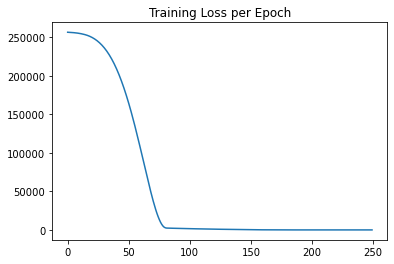

In [37]:
sns.lineplot(x=range(len(loss)),y=loss)
plt.title("Training Loss per Epoch");

## Comparing final evaluation(MSE) on Training set and Test set 

In [38]:
model.metrics_names

['loss']

In [39]:
training_score = model.evaluate(X_train,y_train,verbose=0)
test_score = model.evaluate(X_test,y_test,verbose=0)

In [40]:
training_score

23.982614517211914

In [41]:
test_score

25.861642837524414

## Predictions

In [42]:
test_predictions = model.predict(X_test)

In [43]:
test_predictions

array([[405.91177],
       [624.6073 ],
       [593.13654],
       [573.1865 ],
       [367.1545 ],
       [580.15576],
       [515.8939 ],
       [459.8417 ],
       [550.1587 ],
       [448.23065],
       [612.8298 ],
       [549.86633],
       [419.74985],
       [409.49802],
       [652.3717 ],
       [437.98834],
       [509.28946],
       [661.06946],
       [663.7293 ],
       [566.489  ],
       [334.70206],
       [445.53653],
       [383.1002 ],
       [379.32324],
       [567.5465 ],
       [611.6311 ],
       [533.2719 ],
       [428.52914],
       [656.57434],
       [414.72372],
       [443.33676],
       [485.91336],
       [439.10477],
       [683.0332 ],
       [425.4233 ],
       [418.33163],
       [502.75266],
       [551.3948 ],
       [510.56522],
       [395.9543 ],
       [619.6503 ],
       [417.2754 ],
       [605.4795 ],
       [446.66904],
       [502.80893],
       [582.70435],
       [670.1663 ],
       [491.20114],
       [319.02658],
       [486.2129 ],


In [44]:
pred_df = pd.DataFrame(y_test,columns=['Test Y'])

In [45]:
pred_df

,Test Y
0,402.296319
1,624.156198
2,582.455066
3,578.588606
4,371.224104
...,...
295,525.704657
296,502.909473
297,612.727910
298,417.569725


In [46]:
test_predictions = pd.Series(test_predictions.reshape(300,))

In [47]:
test_predictions

0      405.911774
1      624.607300
2      593.136536
3      573.186523
4      367.154510
          ...    
295    529.917480
296    516.169861
297    610.691650
298    417.603333
299    411.507294
Length: 300, dtype: float32

In [48]:
pred_df = pd.concat([pred_df,test_predictions],axis=1)

In [49]:
pred_df.columns = ['Test Y','Model Predictions']

In [50]:
pred_df

,Test Y,Model Predictions
0,402.296319,405.911774
1,624.156198,624.607300
2,582.455066,593.136536
3,578.588606,573.186523
4,371.224104,367.154510
...,...,...
295,525.704657,529.917480
296,502.909473,516.169861
297,612.727910,610.691650
298,417.569725,417.603333


## Plotting

<AxesSubplot:xlabel='Test Y', ylabel='Model Predictions'>

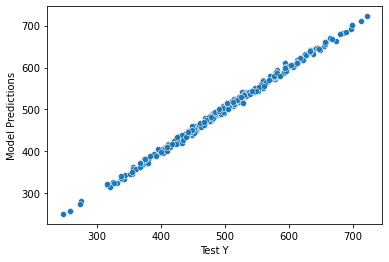

In [51]:
sns.scatterplot(x = 'Test Y', y = 'Model Predictions', data = pred_df)

In [52]:
pred_df['Error'] = pred_df['Test Y'] - pred_df['Model Predictions']

<AxesSubplot:xlabel='Error', ylabel='Density'>

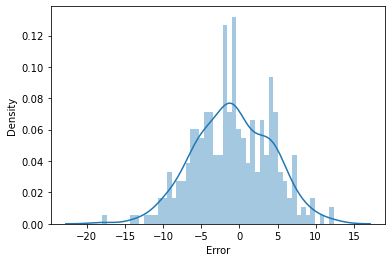

In [53]:
sns.distplot(pred_df['Error'],bins=50)

In [54]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [55]:
mean_absolute_error(pred_df['Test Y'],pred_df['Model Predictions'])

4.107677326943277

In [56]:
mean_squared_error(pred_df['Test Y'],pred_df['Model Predictions'])

25.86164505866909

In [57]:
test_score

25.861642837524414

In [58]:
test_score ** 0.5

5.085434380416722

# Predictions on New Brand Data

In [59]:
# [[Feature1, Feature2]]
new_gem = [[998,1000]]

In [60]:
# Don't forget to scale!
scaler.transform(new_gem)

array([[0.14117652, 0.53968792]])

In [61]:
new_gem = scaler.transform(new_gem)

In [62]:
model.predict(new_gem)

array([[420.33334]], dtype=float32)

# Saving and Loading a Model

In [63]:
from tensorflow.keras.models import load_model

In [64]:
model.save('my_model.h5')  # creates a HDF5 file 'my_model.h5'

In [65]:
later_model = load_model('my_model.h5')

In [66]:
later_model.predict(new_gem)

array([[420.33334]], dtype=float32)

# Great Work!